In [54]:
%matplotlib inline
import cv2
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df_train = pd.read_csv('data/raw/train.csv')

In [9]:
print(df_train.columns)
df_train.head()

Index(['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur',
       'Pawpularity'],
      dtype='object')


Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72

HISTOGRAM OF PAWPULARITY SCORES


<AxesSubplot:>

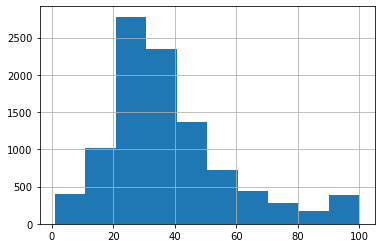

In [11]:
print('HISTOGRAM OF PAWPULARITY SCORES')
df_train['Pawpularity'].hist()


0    9214
1     698
Name: Blur, dtype: int64

SUBJECT FOCUS


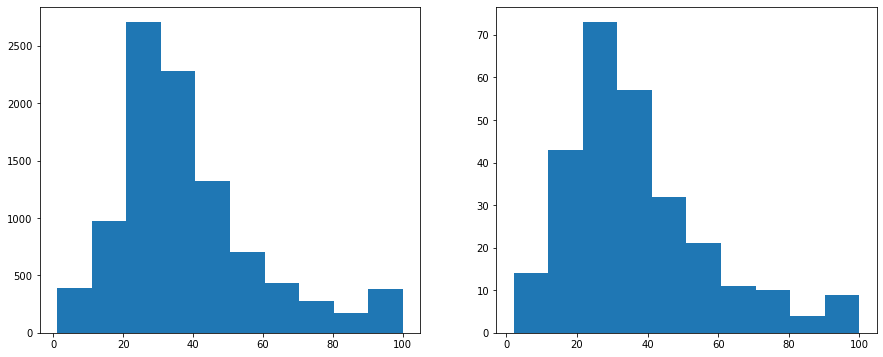

0    9638
1     274
Name: Subject Focus, dtype: int64



    --------------------------------------------------------------------------------------------------
EYES


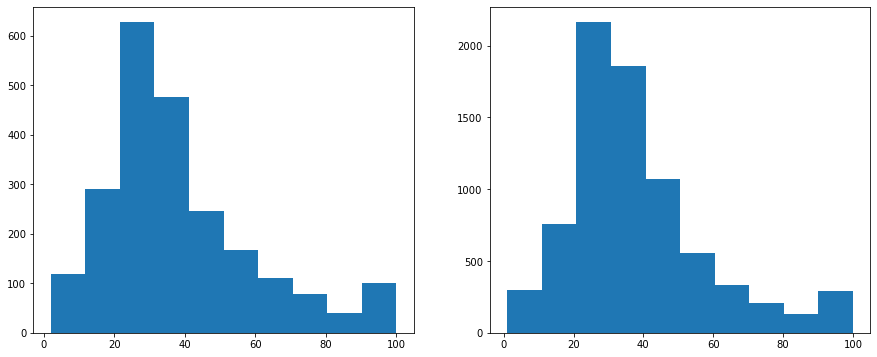

0    2254
1    7658
Name: Eyes, dtype: int64



    --------------------------------------------------------------------------------------------------
FACE


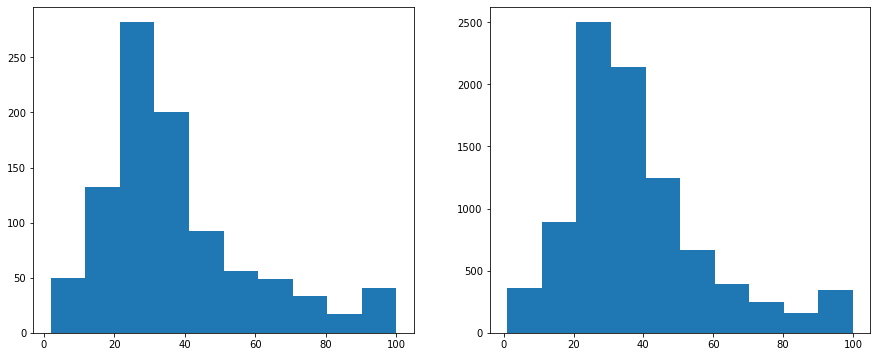

0     952
1    8960
Name: Face, dtype: int64



    --------------------------------------------------------------------------------------------------
NEAR


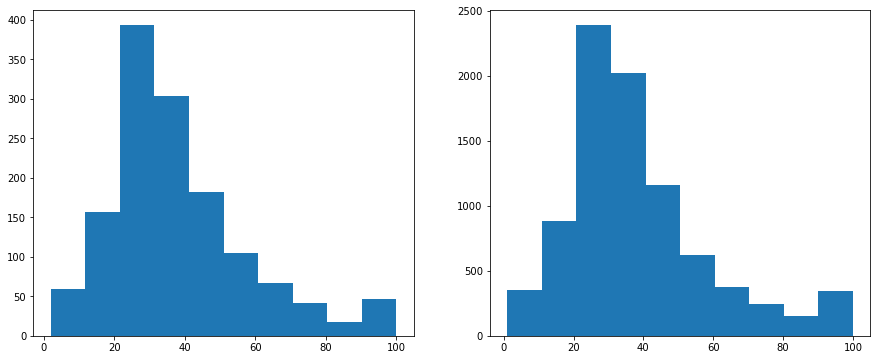

0    1372
1    8540
Name: Near, dtype: int64



    --------------------------------------------------------------------------------------------------
ACTION


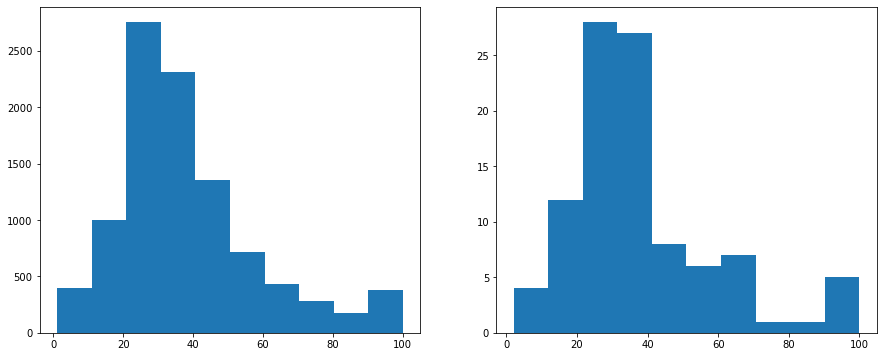

0    9813
1      99
Name: Action, dtype: int64



    --------------------------------------------------------------------------------------------------
ACCESSORY


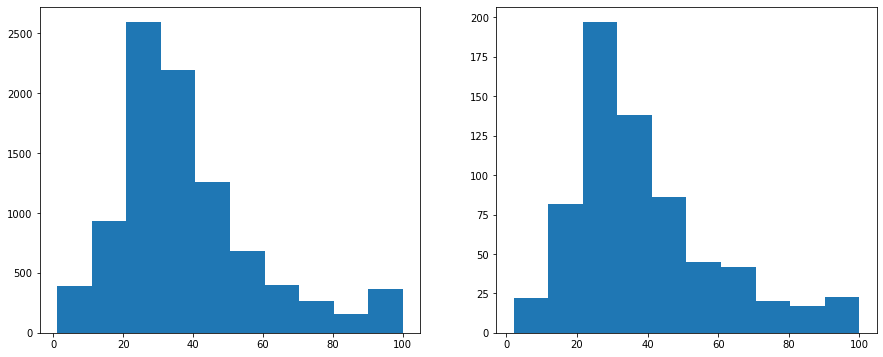

0    9240
1     672
Name: Accessory, dtype: int64



    --------------------------------------------------------------------------------------------------
GROUP


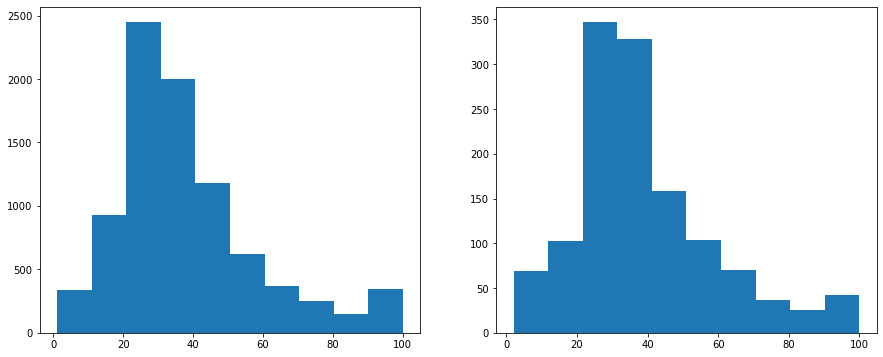

0    8630
1    1282
Name: Group, dtype: int64



    --------------------------------------------------------------------------------------------------
COLLAGE


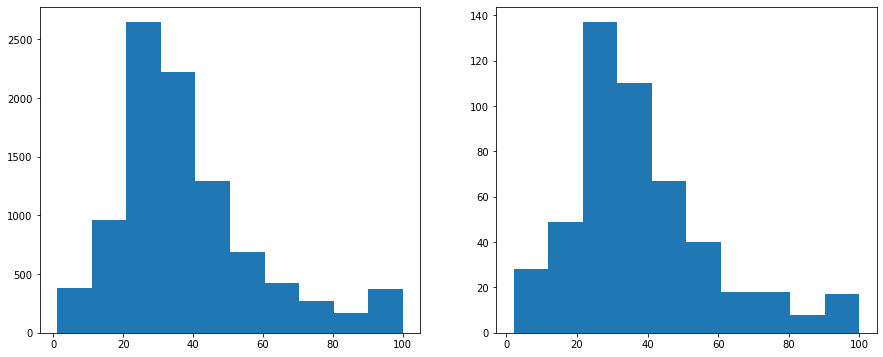

0    9420
1     492
Name: Collage, dtype: int64



    --------------------------------------------------------------------------------------------------
HUMAN


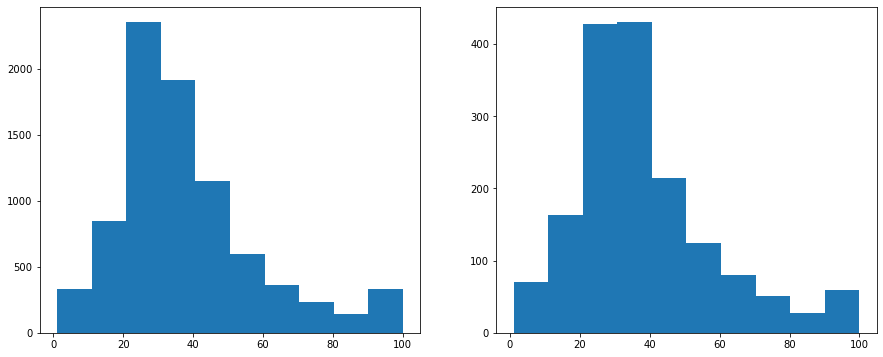

0    8264
1    1648
Name: Human, dtype: int64



    --------------------------------------------------------------------------------------------------
OCCLUSION


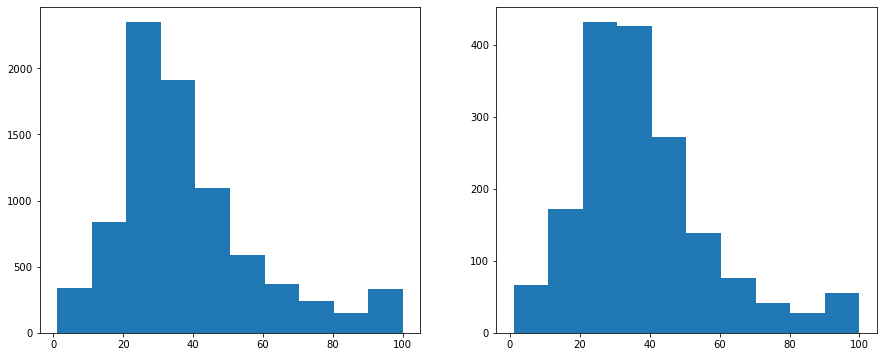

0    8207
1    1705
Name: Occlusion, dtype: int64



    --------------------------------------------------------------------------------------------------
INFO


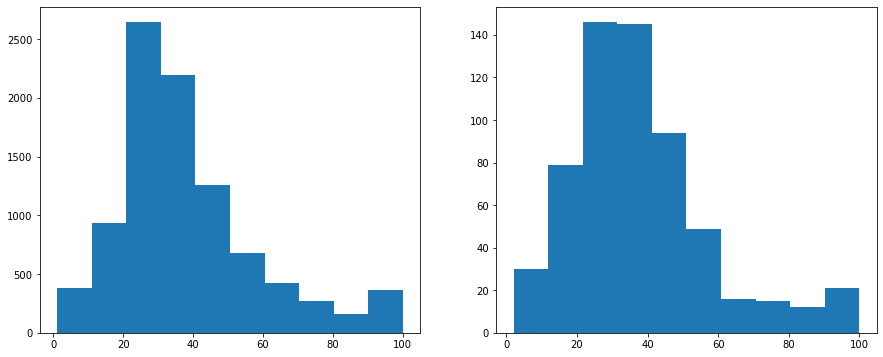

0    9305
1     607
Name: Info, dtype: int64



    --------------------------------------------------------------------------------------------------
BLUR


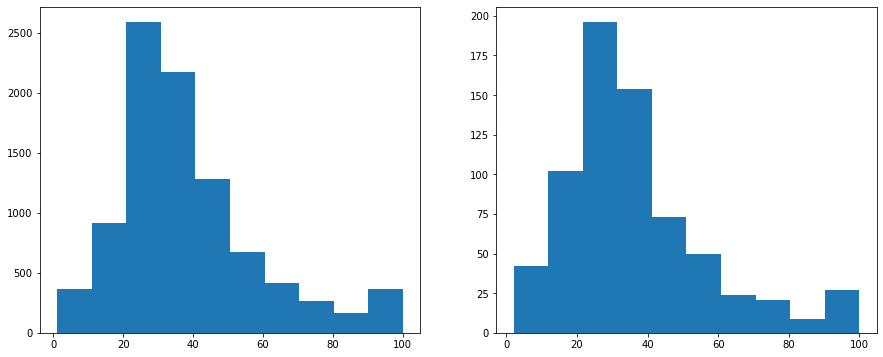

0    9214
1     698
Name: Blur, dtype: int64



    --------------------------------------------------------------------------------------------------


In [86]:
for col in df_train.columns[1:-1]:
    fig = plt.figure(figsize=(15, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.hist(df_train[df_train[col]==0]['Pawpularity'])
    ax2.hist(df_train[df_train[col]==1]['Pawpularity'])

    # df_train['Blur'].describe()
    print('\033[1m' +   col.upper())
    plt.show(fig)
    print(df_train[col].value_counts().sort_index())
    print('\n\n\n  \033[1m  --------------------------------------------------------------------------------------------------')


SUBJECT FOCUS


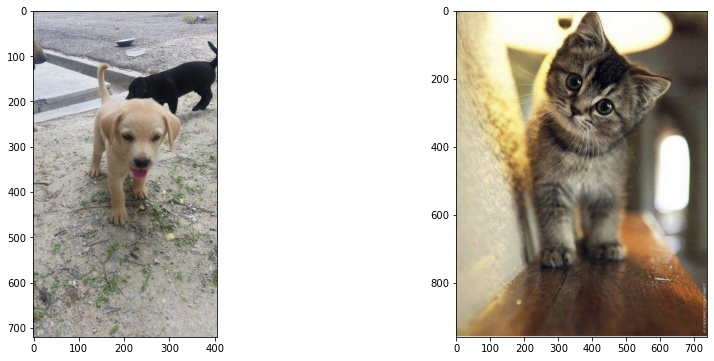

EYES


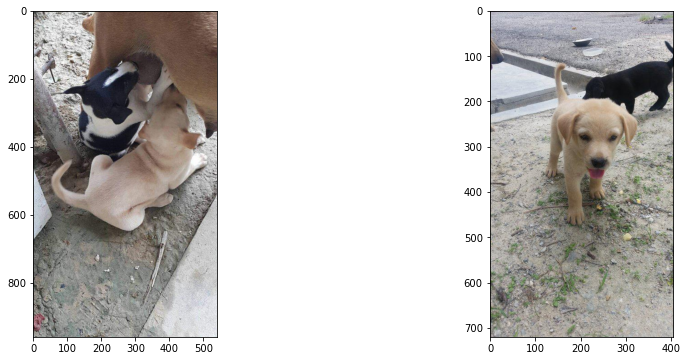

FACE


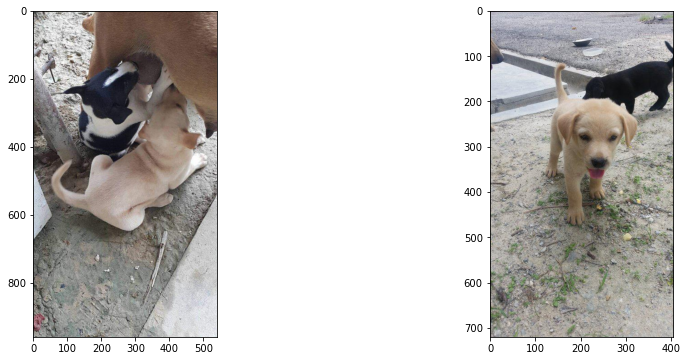

NEAR


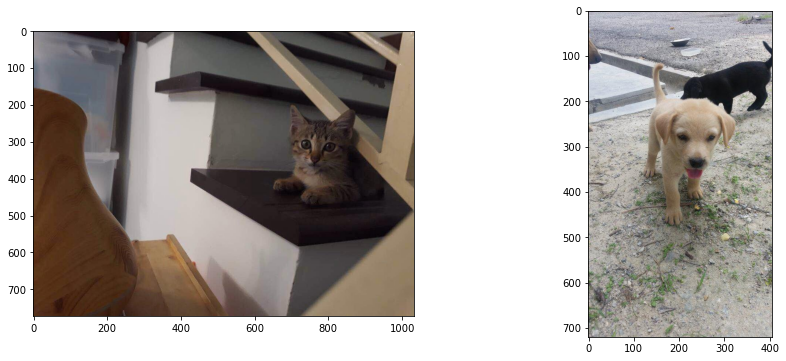

ACTION


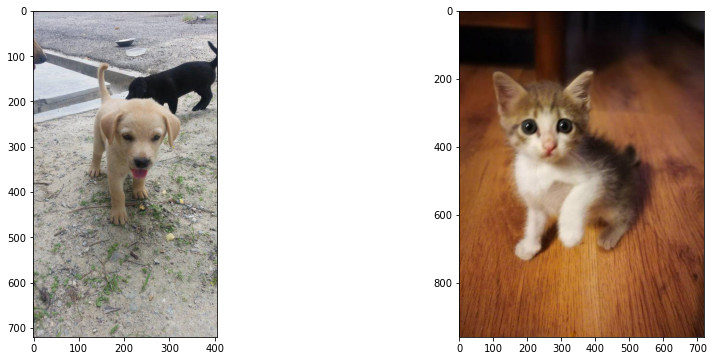

ACCESSORY


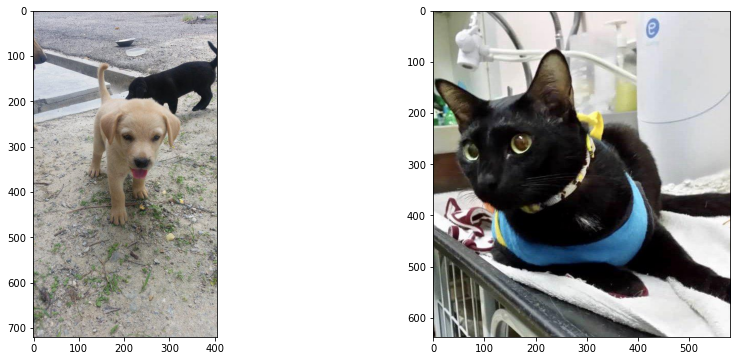

GROUP


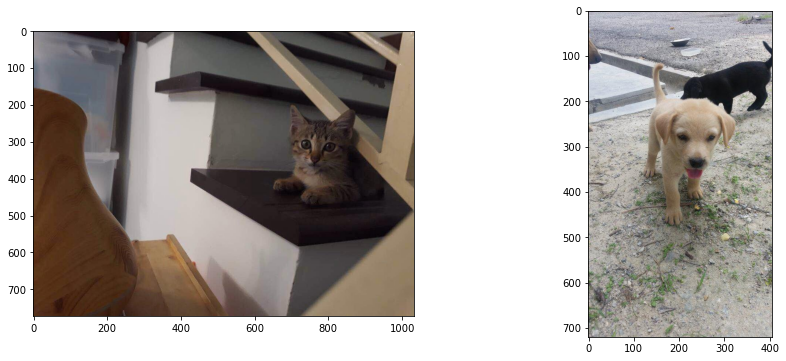

COLLAGE


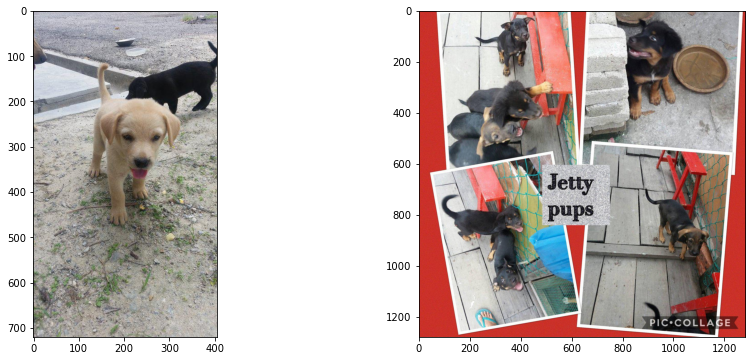

HUMAN


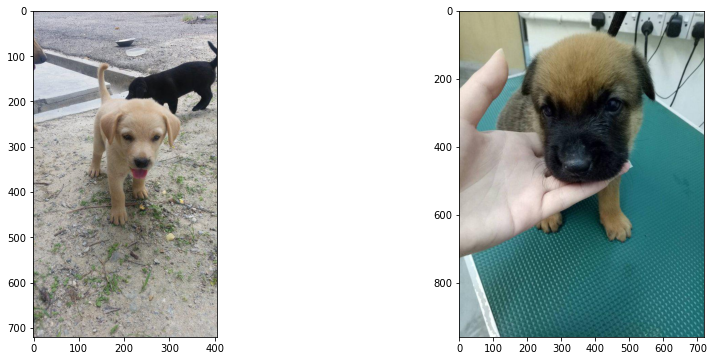

OCCLUSION


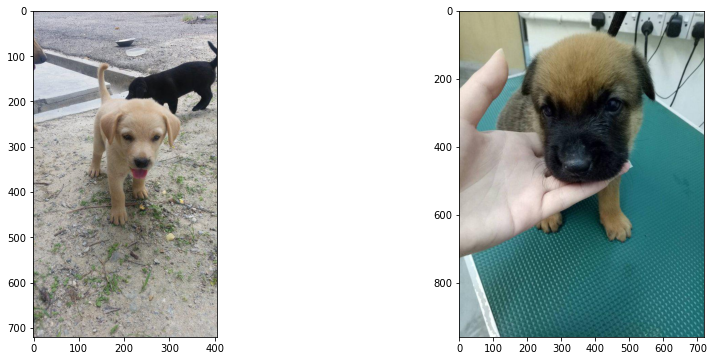

INFO


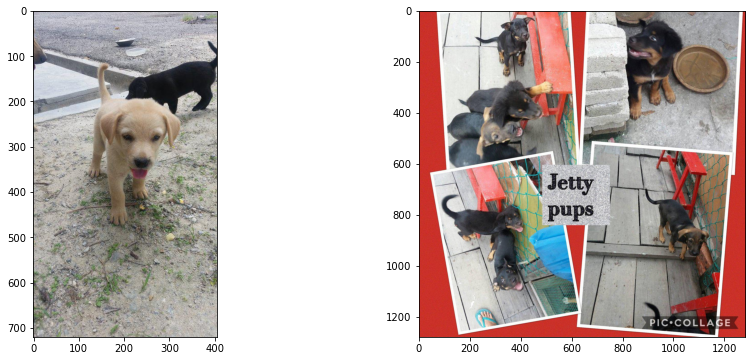

BLUR


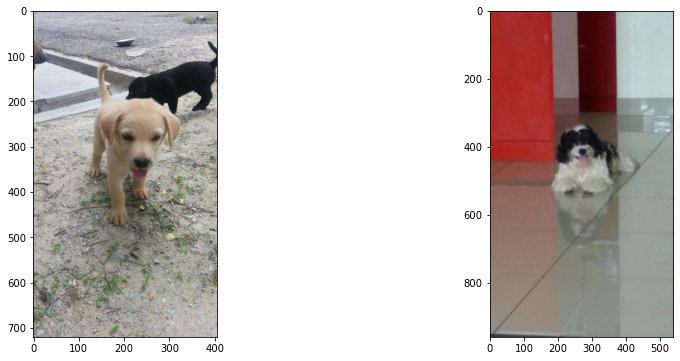

In [114]:


for col in df_train.columns[1:-1]:
    print('\033[1m' + col.upper())
    fig = plt.figure(figsize=(15, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    df_train[df_train[col]==0]['Id'].values[0]

    ax1.imshow(cv2.cvtColor(cv2.imread('data/raw/train/' + df_train[df_train[col]==0]['Id'].values[0] + '.jpg'), cv2.COLOR_BGR2RGB))

    ax2.imshow(cv2.cvtColor(cv2.imread('data/raw/train/' + df_train[df_train[col]==1]['Id'].values[0] + '.jpg'), cv2.COLOR_BGR2RGB))
    
    plt.show(fig)
    
#      print('\n\n\n  \033[1m  --------------------------------------------------------------------------------------------------')


In [119]:
import os

In [128]:
train_images = sorted(os.listdir('data/raw/train/'))
img_sizes = []
for ind in range(len(train_images)):
    img_sizes.append(round(os.path.getsize('data/raw/train/'+ train_images[ind] )/1000,0))

(array([1.933e+03, 4.840e+03, 2.003e+03, 7.090e+02, 2.580e+02, 1.050e+02,
        3.500e+01, 1.800e+01, 9.000e+00, 2.000e+00]),
 array([  4. ,  59.7, 115.4, 171.1, 226.8, 282.5, 338.2, 393.9, 449.6,
        505.3, 561. ]),
 <BarContainer object of 10 artists>)

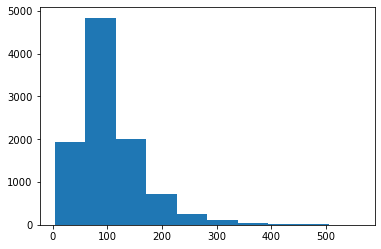

In [129]:
plt.hist(img_sizes)

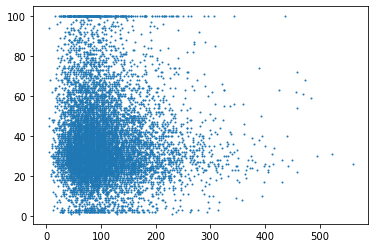

In [136]:
plt.scatter(df_train.apply(lambda x: round(os.path.getsize('data/raw/train/'+ x['Id'] + '.jpg')/1000,0) , axis=1), df_train['Pawpularity'], s=1)

In [126]:

os.path.getsize('data/raw/train/'+ '0a0da090aa9f0342444a7df4dc250c66.jpg' )

30938

In [149]:
import torch
use_cuda = torch.cuda.is_available()

In [150]:
use_cuda

False

In [151]:
torch.__version__

'1.10.0'

In [148]:
torch.cuda.is_available()

False